20
-0.4506297285348699
0.4226406349576464
-0.7049037437862584
0.7509134834758495
1.4935431669714676
-0.9169027930515986
Centre X coord:  1.54753729842198
Centre Y coord:  1.5233252286771584
Semi-Major Axis:  1.5559502227752384 3.111900445550477
Semi-Minor Axis:  0.9861498603678017 1.9722997207356034
Rotation angle:  -150.51622524798717 29.483774752012835
a: [0.         0.12822827 0.25645654 0.38468481 0.51291309 0.64114136
 0.76936963 0.8975979  1.02582617 1.15405444 1.28228272 1.41051099
 1.53873926 1.66696753 1.7951958  1.92342407 2.05165235 2.17988062
 2.30810889 2.43633716 2.56456543 2.6927937  2.82102197 2.94925025
 3.07747852 3.20570679 3.33393506 3.46216333 3.5903916  3.71861988
 3.84684815 3.97507642 4.10330469 4.23153296 4.35976123 4.48798951
 4.61621778 4.74444605 4.87267432 5.00090259 5.12913086 5.25735913
 5.38558741 5.51381568 5.64204395 5.77027222 5.89850049 6.02672876
 6.15495704 6.28318531]
Ellipse Y: [0.75752221 0.65403474 0.56482101 0.49134588 0.43481583 0.39615907
 0

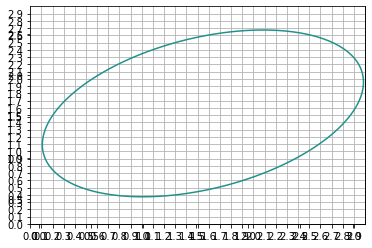

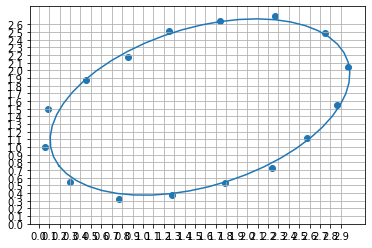

In [8]:
from typing import List, Dict, Iterable, Tuple, Callable
from matplotlib import pyplot as plt
from collections import Counter
# import pygal
import sys
import os
import string
import urllib.request
import requests
import curl
import pycurl
import webbrowser
import numpy as np
# import mypy
import math
import pandas as pd
# from IPython import qt
from matplotlib.pyplot import figure
from py.xml import raw
from requests.api import get

os.system("cls")
plt.close()

#%%
# Setup Data

# x0 = [1,2,5,7,9,6,3,8]
# y0 = [7,6,8,7,5,7,2,4]
# x = np.array(x0)
# y = np.array(y0)

# x0 = [1,2,5,7,9,3]
# y0 = [7,6,8,7,5,7]
# x0 = [8,3,2,7,6,6,4]
# y0 = [1,6,3,7,1,10,0]
# x0 = [0,2,1,7]
# y0 = [1,5,6,6]
# x = np.array(x0)
# y = np.array(y0)
# z0 = [a**2 + b**2 for a,b in zip(x0, y0)]
# z = np.array(z0)

x = np.array(
[ 2.2422,   2.5713,   2.8677,   2.9708,
  2.7462,   2.2695,   1.7423,   1.2501,
  0.8562,   0.4489,   0.0933,   0.0639,
  0.3024,   0.7666,   1.2813,   1.7860])

y = np.array(
[ 0.7216,   1.1190,   1.5447,   2.0398,
  2.4942,   2.7168,   2.6496,   2.5163,
  2.1730,   1.8725,   1.5018,   0.9970,
  0.5509,   0.3211,   0.3729,   0.5340])

z0 = [a**2 + b**2 for a,b in zip(x, y)]
z = np.array(z0)

x_0 = x
y_0 = y

# Array lengths
leng = len(x)
#%%
# Initial Guesses
# A = np.ones((leng,3))
# B = np.ones((leng,1))

# for i in range(0,leng):
#     A[i][0] = 2 * x[i]
#     A[i][1] = 2 * y[i]
#     A[i][2] = -1
#     B[i][0] = x[i] ** 2 + y[i] ** 2

# u0 = np.matmul(np.linalg.pinv(A), B)
# print(u0)
# u1 = u0[0]
# u2 = u0[1]
# rad = u0[2]

A = 1
B = 1
C = 1
D = 1
E = 1
G = -1
# F = 1

# Tolerance
tol = 0.1
# Iterations
iter = 0
iterations = []
# Coefficients
coeff = []

# while tol > 1e-5:
while iter < 20:
    # Number of iterations
    iter = iter + 1
    iterations.append(iter)

    #%%
    # Setup Equations

    # Intialize Array
    F = []

    # Vector valued function
    for i in range(0,leng):
        f = A*x[i]*x[i] + B*x[i]*y[i] + C*y[i]*y[i] + D*x[i] + E*y[i] + G
        F.append(f)
    # Convert to Array
    F = np.matrix(F)

    # print(F.T)

    # Hessian/Jacobian
    # Initialize matrix
    mat_1 = np.ones((6,leng))

    # First Row
    for i in range(0,leng):
        mat_1[0][i] = x[i] ** 2
    # Second Row
        mat_1[1][i] = x[i] * y[i]
    # Third row
        mat_1[2][i] = y[i] ** 2
    # Fourth row
        mat_1[3][i] = x[i]
    # Fifth row
        mat_1[4][i] = y[i]
    # Sixth row
        mat_1[5][i] = i


    # print(mat_1.T)

    #%%
    # Calculations
    F_delta = np.matmul(F,mat_1.T)

    # Gradient
    F_delta_1 = np.matmul(mat_1, mat_1.T)
    # print(F_delta_1)

    # Solve coefficients p
    # Gradient inverse
    F_delta_1_inv = np.linalg.pinv(F_delta_1)

    # Solve for p
    p = np.matmul(-F_delta, F_delta_1_inv)
    # print("P:", p)
    # Convert to list
    p_list = p.tolist()
    p_list = p_list[0]
    coeff.append(p_list[0])

    # Update guesses
    A += p_list[0]
    B += p_list[1]
    C += p_list[2]
    D += p_list[3]
    E += p_list[4]
    G += p_list[5]
    # tol = abs(p_list[0])
    tol = abs(np.sum(F_delta))
    # print(tol)
    if tol < 1e-12:
        break

# Constant term
# G = -1.00

print(iter)
print(A)
print(B)
print(C)
print(D)
print(E)
print(G)

#%%
# Create degenerate matrix i.e. determinant
det_mat = [[A, 0.5*B, 0.5*D],
            [0.5*B,C,0.5*E],
            [0.5*D, 0.5*E, G]]

#%%
# Ellipse properties
# Formulae from Wikipedia
# https://en.wikipedia.org/wiki/Ellipse

# Centre of ellipses
# Denominator
# B1 = 0.5 * B
# D1 = 0.5 * D
# E1 = 0.5 * E
denom = (B ** 2) - 4 * A * C
# Numerators
num_x = 2*C*D - B*E
num_y = 2*A*E - B*D
# X-coord
X_C = num_x / denom
# Y-coord
Y_C = num_y / denom

# Semi-Major (a), Semi-Minor axes(b)

# Denominator
denom = (B ** 2) - 4 * A * C
# Numerator
part_1 = 2 * (A*E*E + C*D*D - B*D*E + (denom)*G)
part_2_a = (A + C) - np.sqrt(((A - C) ** 2) + B * B)
part_2_b = (A + C) + np.sqrt(((A - C) ** 2) + B * B)
a = (-1 * np.sqrt(part_1 * part_2_a))/denom
b = (-1 * np.sqrt(part_1 * part_2_b))/denom

# Rotation Angle
rot_angle = np.arctan((1/B) * (C - A - np.sqrt((A - C)**2 + B*B))) - np.pi/2


print("Centre X coord: ", X_C)
print("Centre Y coord: ", Y_C)
print("Semi-Major Axis: ", a, a*2)
print("Semi-Minor Axis: ", b, b*2)
print("Rotation angle: ", math.degrees(rot_angle), math.degrees(rot_angle) + 180)
# print(rot_angle)

#%%
# Plot ellipse

x = np.linspace(-10,+50,2000)
y = np.linspace(-10,+50,2000)

X,Y = np.meshgrid(x,y)

#equation: 7.91x^2 + -0.213xy + 5.46y^2 -0.031x -0.0896y = 1
eqn = A * X**2 + B*X*Y + C*Y**2 + D*X + E*Y + G
Z = 0

# print(np.max(eqn))

plot1 = plt.figure(1)
plt.scatter(x_0,y_0)
ax = plot1.add_subplot(111)
plt.contour(X,Y,eqn,Z)
plt.xlim([0,3])
plt.ylim([0,3])
plt.xticks(np.arange(0, 3, step=0.1))
plt.yticks(np.arange(0,3, step=0.1))
# ax.set_aspect('equal', adjustable='box')
plt.grid()

# Angle: theta
theta = np.linspace(0, 2*np.pi)

# Coordinates
# x10 = X_C + a * np.cos(theta)
# y10 = Y_C + b * np.sin(theta)
x10 = a * np.cos(theta)
y10 = b * np.sin(theta)
xy_1 = np.vstack((x10,y10))
# xy_1 = np.degrees(xy_1)
# print(x10)
# print(xy_1)
# rot_angle = math.degrees(rot_angle) - np.pi/2
# print(np.cos(rot_angle))
R = [[np.cos(rot_angle), -np.sin(rot_angle)],
      [np.sin(rot_angle), np.cos(rot_angle)]]


R_deg = np.degrees(R)
# print(R_deg)

xx = np.matmul(R,xy_1)
# xc = np.matmul(R,xy_1)
# print(xx)
xr = xx[0]
yr = xx[1]

print("a:", theta)

ellipse_x = a*np.cos(theta)*np.cos(rot_angle) - b*np.sin(theta)*np.sin(rot_angle) + X_C
ellipse_y = b*np.sin(theta)*np.cos(rot_angle) + a*np.cos(theta)*np.sin(rot_angle) + Y_C
print("Ellipse Y:", ellipse_y)
ellipse_z = np.ones(len(ellipse_y))

zz_mesh_ellipse = A*ellipse_x + ellipse_y*B + C

# Plots
# plot4 = plt.figure(4)
# ax = plt.axes(projection = '3d')
# # ax.scatter(x, y, z)
# ax.plot_wireframe(ellipse_x, ellipse_y, zz_mesh_ellipse, cmap = 'viridis', edgecolor = 'green')

plot2 = plt.figure(2)
# plt.plot(np.degrees(x10 + xr ),np.degrees(y10 + yr ))
# plt.plot(x10 + xr,y10 + yr)
plt.scatter(x_0,y_0)
plt.plot(ellipse_x,ellipse_y)
plt.xticks(np.arange(0, max(ellipse_x), step=0.1))
plt.yticks(np.arange(0,max(ellipse_y), step=0.1))
plt.grid()

plt.show()

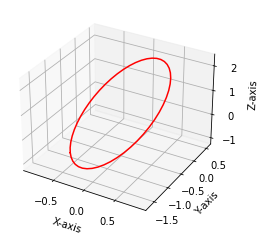

In [9]:
#%%
# Plot 3D
# Theta
Theta = np.arctan(1/B * (C - A - np.sqrt((A-C)**2 + B**2)))
# Coefficients
A = a**2*np.sin(Theta)**2 + b**2*np.cos(Theta)**2
B = 2*(b**2 - a**2)*np.sin(Theta)*np.cos(Theta)
C = a**2*np.cos(Theta)**2 + b**2*np.sin(Theta)**2

# 3D ellipse plot
zz_mesh_ellipse = A*ellipse_x + ellipse_y*B + C

# Denominator
denom = (B ** 2) - 4 * A * C
# Numerator
part_1 = 2 * (A*E*E + C*D*D - B*D*E + (denom)*G)
part_2_a = (A + C) - np.sqrt(((A - C) ** 2) + B * B)
part_2_b = (A + C) + np.sqrt(((A - C) ** 2) + B * B)
a = (-1 * np.sqrt(part_1 * part_2_a))/denom
b = (-1 * np.sqrt(part_1 * part_2_b))/denom

x_c = (2*C*D - B*E)/denom
y_c = (2*A*E - B*D)/denom

ellipse_x = a*np.cos(theta)*np.cos(rot_angle) - b*np.sin(theta)*np.sin(rot_angle) + x_c
ellipse_y = b*np.sin(theta)*np.cos(rot_angle) + a*np.cos(theta)*np.sin(rot_angle) + y_c

zz_mesh_ellipse = A*ellipse_x + ellipse_y*B + C

plot6 = plt.figure(6)
ax = plt.axes(projection = '3d')
ax.plot(ellipse_x,ellipse_y,zz_mesh_ellipse, color = 'red')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()